**Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data preprocessing**

In [ ]:
##YOUR DATASET PATH PLS INSERT BELOW##
DF = pd.read_csv('/content/drive/MyDrive/SC1015_dataset/Churn.csv')
##YOUR DATASET PATH PLS INSERT ON TOP##
print(DF)
##dropping unnecessary columns
DF=pd.DataFrame(DF.drop('customerID', axis = 1))
DF = DF[DF['TotalCharges'] != " "]
DF["MultipleLines"].replace("No phone service","No",inplace=True)
DF["OnlineSecurity"].replace("No internet service","No",inplace=True)
DF["OnlineBackup"].replace("No internet service","No",inplace=True)
DF["DeviceProtection"].replace("No internet service","No",inplace=True)
DF["TechSupport"].replace("No internet service","No",inplace=True)
DF["StreamingTV"].replace("No internet service","No",inplace=True)
DF["StreamingMovies"].replace("No internet service","No",inplace=True)
DF.dropna()
DF.head()

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
colslabel =['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
##label encoding
DF[colslabel] = DF[colslabel].apply(LabelEncoder().fit_transform)
print(DF)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                0     

In [ ]:
##response variable churn##
y_total = DF.iloc[:,-1].values
print(y_total)
##response variable churn##

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [ ]:
##encoding True and False from churn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_total = le.fit_transform(y_total)
print(y_total)

[0 0 1 ... 0 1 0]


In [ ]:
from sklearn.model_selection import train_test_split
data = DF.iloc[:,:].values
x_checktrain, x_checktest, y_train, y_test = train_test_split(data, y_total, test_size = 0.2, random_state = 0)
print(x_checktrain)
print(x_checktest)


[[1 0 1 ... 58.35 '1346.9' 'No']
 [0 0 1 ... 113.65 '8166.8' 'No']
 [1 0 1 ... 25.35 '1715.15' 'No']
 ...
 [1 0 1 ... 105.95 '5341.8' 'Yes']
 [0 0 1 ... 80.45 '1137.05' 'No']
 [1 0 0 ... 104.65 '6889.8' 'No']]
[[1 0 0 ... 20.65 '20.65' 'No']
 [1 0 0 ... 20.6 '330.25' 'No']
 [0 0 0 ... 19.8 '19.8' 'No']
 ...
 [1 0 0 ... 69.75 '324.6' 'Yes']
 [0 0 1 ... 115.0 '7396.15' 'No']
 [1 1 1 ... 43.35 '371.4' 'No']]


In [ ]:
x_train = x_checktrain[:,:-1]
x_checktr = x_checktrain[:,-1]
x_test = x_checktest[:,:-1]
x_checkte = x_checktest[:,-1]
print(x_train)
print(x_test)
print(x_checkte)
print(x_checktr)

[[1 0 1 ... 2 58.35 '1346.9']
 [0 0 1 ... 1 113.65 '8166.8']
 [1 0 1 ... 3 25.35 '1715.15']
 ...
 [1 0 1 ... 1 105.95 '5341.8']
 [0 0 1 ... 1 80.45 '1137.05']
 [1 0 0 ... 1 104.65 '6889.8']]
[[1 0 0 ... 2 20.65 '20.65']
 [1 0 0 ... 1 20.6 '330.25']
 [0 0 0 ... 1 19.8 '19.8']
 ...
 [1 0 0 ... 2 69.75 '324.6']
 [0 0 1 ... 2 115.0 '7396.15']
 [1 1 1 ... 3 43.35 '371.4']]
['No' 'No' 'No' ... 'Yes' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [ ]:
##scaling for large values of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(len(x_test))
print(x_train)
print(x_test)

1407
[[ 0.99485767 -0.43730142  1.03898144 ...  0.39721932 -0.21055658
  -0.409637  ]
 [-1.00516891 -0.43730142  1.03898144 ... -0.54198147  1.63040752
   2.60288914]
 [ 0.99485767 -0.43730142  1.03898144 ...  1.33642011 -1.30914275
  -0.24697145]
 ...
 [ 0.99485767 -0.43730142  1.03898144 ... -0.54198147  1.37407075
   1.35501361]
 [-1.00516891 -0.43730142  1.03898144 ... -0.54198147  0.52516325
  -0.50233317]
 [ 0.99485767 -0.43730142 -0.9624811  ... -0.54198147  1.33079311
   2.03880523]]
[[ 0.99485767 -0.43730142 -0.9624811  ...  0.39721932 -1.46560805
  -0.99547591]
 [ 0.99485767 -0.43730142 -0.9624811  ... -0.54198147 -1.46727258
  -0.85871758]
 [-1.00516891 -0.43730142 -0.9624811  ... -0.54198147 -1.49390497
  -0.99585138]
 ...
 [ 0.99485767 -0.43730142 -0.9624811  ...  0.39721932  0.16895501
  -0.86121334]
 [-1.00516891 -0.43730142  1.03898144 ...  0.39721932  1.67534968
   2.26247311]
 [ 0.99485767  2.28675226  1.03898144 ...  1.33642011 -0.70991393
  -0.84054057]]


**ANN construction**

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**ANN training**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6123 - accuracy: 0.6315
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7362
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7579
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7675
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7758
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7820
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.7899
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7911
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7947
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4220 - accura

**ANN Prediction**



In [ ]:

for a,b in zip(x_test,x_checkte):
  ##false
  if(ann.predict(np.array([a])) <0.5):
    print("Predicted:")
    print("No")
    print("actual:")
    print(b)
    
  ##true
  else:
    print("Predicted:")
    print("Yes")
    print("actual:")
    print(b)
    
  

Streaming output truncated to the last 5000 lines.
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
Yes
actual:
No
Predicted:
No
actual:
No
Predicted:
Yes
actual:
Yes
Predicted:
Yes
actual:
Yes
Predicted:
Yes
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
Yes
actual:
Yes
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
Yes
actual:
Yes
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
Yes
Predicted:
No
actual:
No
Predicted:
No
actual:
Yes
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predicted:
No
actual:
Yes
Predicted:
Yes
actual:
Yes
Predicted:
Yes
actual:
Yes
Predicted:
No
actual:
No
Predicted:
No
actual:
No
Predict

In [ ]:
##confusion matrix with multiple predictions and accuracy rating##
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
##confusion matrix with multiple predictions and accuracy rating##

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


classification accuracy :	 0.8024164889836531
TPR Test :	 0.5040650406504065
TNR Test :	 0.9084778420038536

FPR Test :	 0.09152215799614644
FNR Test :	 0.4959349593495935


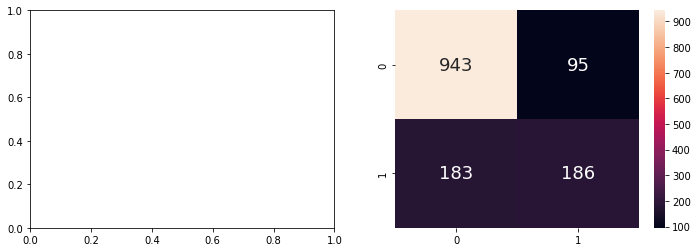

In [ ]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test,y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]
print("classification accuracy :\t",(tpTest+tnTest)/(tpTest+tnTest+fpTest+fnTest))
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

**investigation appendix**

In [ ]:
##concatenating 2 arrays##
##include day charge?More variables to be included:)
##to do that need to concatenate 2 arrays
arr1 = np.array([[1, 2], [3, 4]])

arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=1)

print(arr)
##drop columns that contain a certain value
DF = DF[DF['TotalCharges'] != " "]

[[1 2 5 6]
 [3 4 7 8]]
